In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

(-1.5, 1.5)

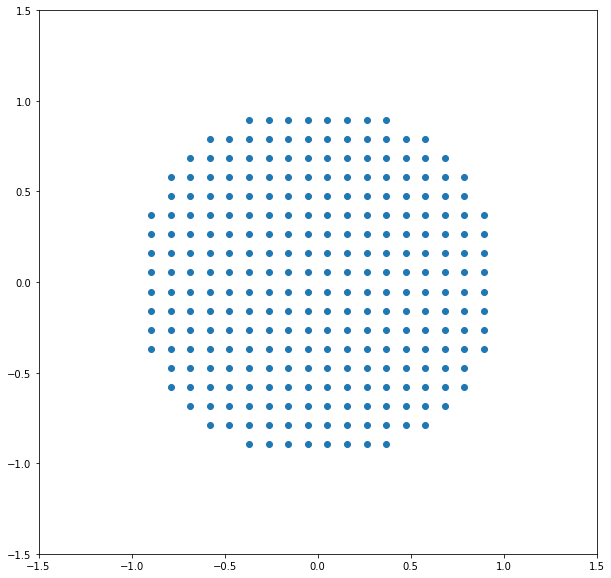

In [13]:

lim = 1.5



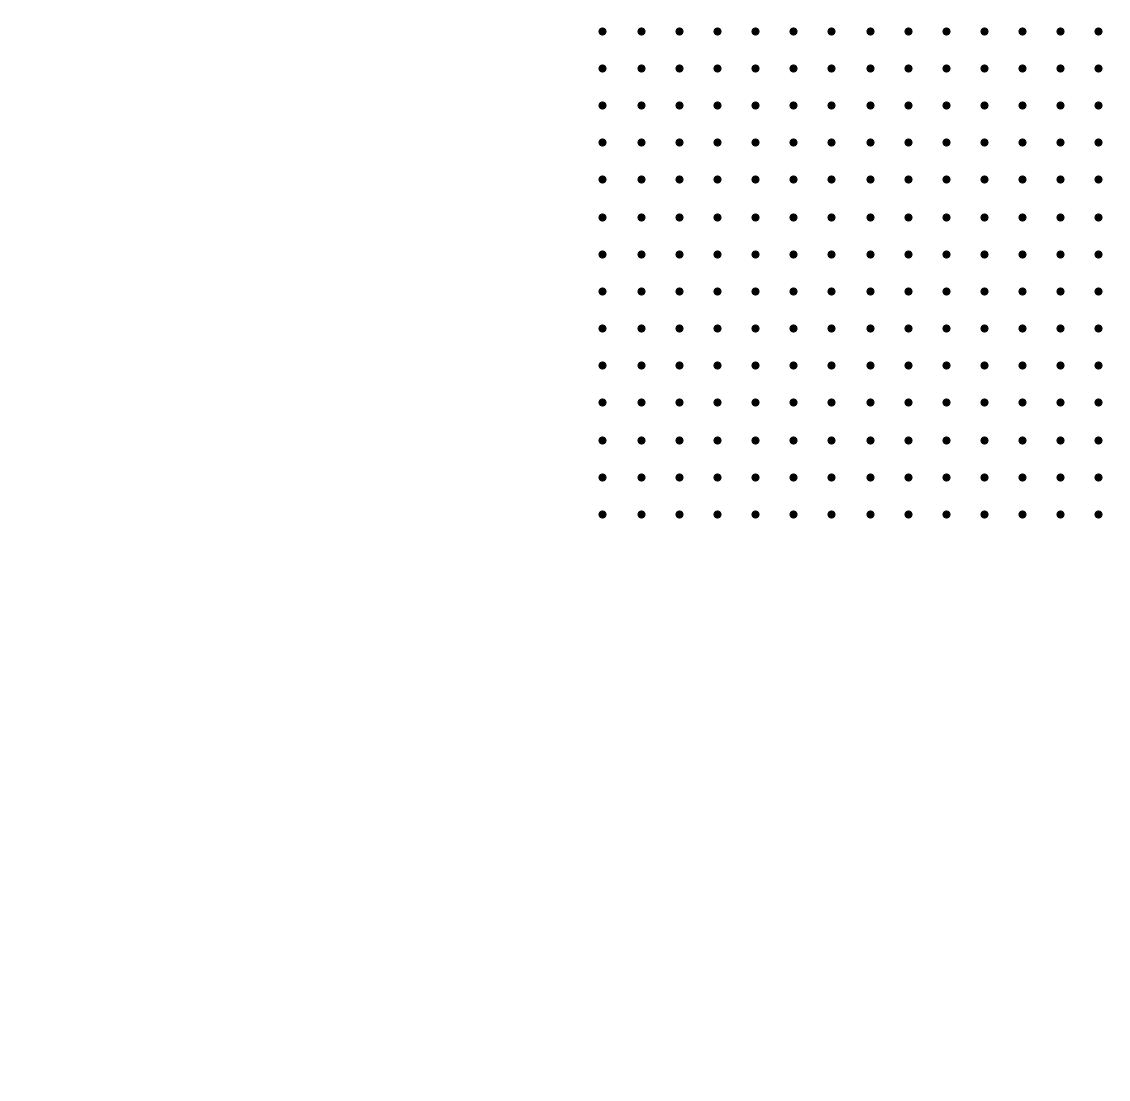

In [59]:
from PIL import Image

lim = 1.5

sc = None  # Outside the function
def show_stimulus(t, direction=45, speed=3):
    x = np.linspace(-2, 2, 40)
    x, y = np.meshgrid(x, x, copy=True)

    r = t/100 * speed
    x += r * np.cos(direction * np.pi / 180)
    y += r * np.sin(direction * np.pi / 180)
    filter = [True]*len(x)#(x**2+y**2)<1
    
    sc = ax.scatter(x[filter], y[filter], 50, color="k")
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.axis('off')

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

fps = 100

frames = []
for i in range(fps):
    ax.clear()
    show_stimulus(i)
    plt.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(Image.fromarray(data))

frames[0].save("paper_figures/trial.gif",
               save_all=True,
               append_images=frames[1:],
               loop=0,
               duration=1000//fps,  # 1000 milliseconds divided by fps
               disposal=2)  # 2 means the background color should be restored

plt.show()